Assignment 10 Supplementary: Semantic Search Demo
===============

This Python notebook guides you through the code for Text-to-Image and Image-to-Image search.

Prior to starting, you should have a file called `image_embeddings.pickle` and a file called `coco_images_resized.zip` in the current directory.

First, unzip `coco_images_resized.zip`. This directory contains the images that you will search through.

This assignment uses pretrained CLIP (Contrastive Language Image Pretrained) models to embed text and images into a joint embedding space. You can read about CLIP models here: https://www.pinecone.io/learn/clip-image-search/

**Your end goal is to find the most relevant images given either an image or a text query.**

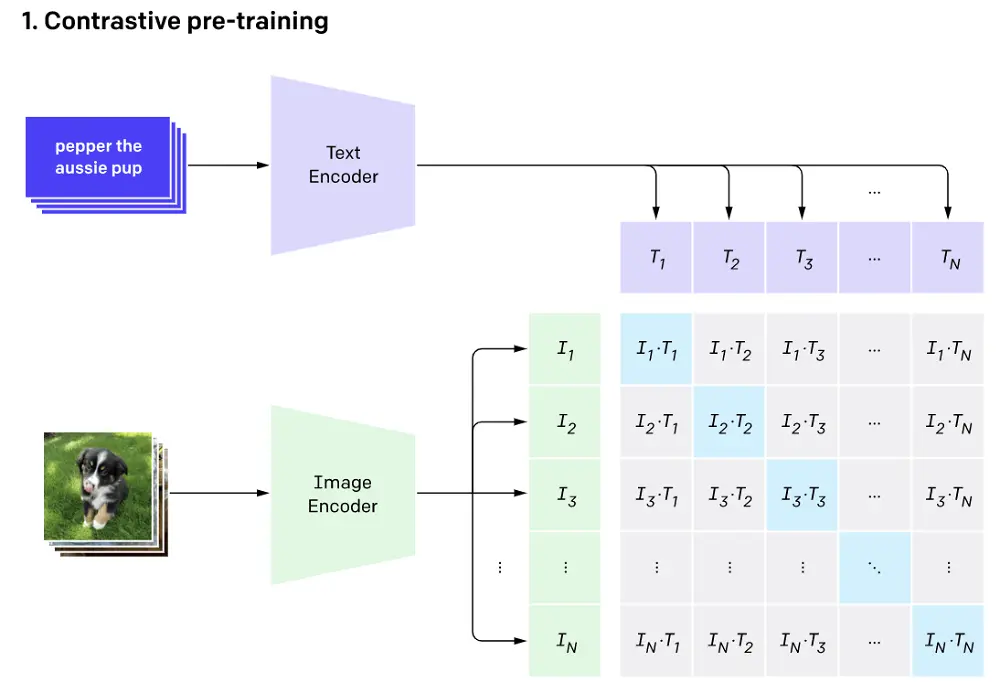

### Step 1: Caclulate Image Embeddings for Dataset

We first want to make our image database easily searchable. To achieve this, we calculate the image embedding for each image using the image encoder. **This has already been done for you,** because it is computationally intensive. Below is the code for reference.

Run the code below to examine the dataframe.

The dataframe `df` has two columns. The first column is the image file in the dataset folder. The second column is the image embedding corresponding to that image.

In [9]:
import pandas as pd
df = pd.read_pickle('all_images/image_embeddings.pickle')
df

,file_name,embedding
0,COCO_train2014_000000017154.jpg,"[-0.013383481, 0.025817081, 0.027312446, 0.029..."
1,COCO_train2014_000000356738.jpg,"[-0.018858824, 0.066932686, -0.023063071, -0.0..."
2,COCO_train2014_000000124428.jpg,"[0.034829315, -0.014156876, -0.0095499605, 0.0..."
3,COCO_train2014_000000277426.jpg,"[-0.00678755, -0.04286685, 0.0022111333, -0.02..."
4,COCO_train2014_000000474616.jpg,"[0.017978659, 0.002254282, -0.00318466, 0.0169..."
...,...,...
82778,COCO_train2014_000000090708.jpg,"[-0.03795312, -0.012270769, 0.009529039, 0.018..."
82779,COCO_train2014_000000493505.jpg,"[-0.013693268, 0.03612202, -0.018199965, 0.000..."
82780,COCO_train2014_000000517584.jpg,"[0.018850781, -0.0006246638, -0.02557726, 0.03..."
82781,COCO_train2014_000000234720.jpg,"[-0.008946741, -0.00071093737, -0.009944752, 0..."


### Step 2: Image-to-Image Search

Now you will write some code to find the closest image in the dataset to a given image query.

Find a random image off the internet. Use the CLIP image encoder to encode the image; let's call this the `query_embedding`.

Now, display the image in the dataset that has the **maximum cosine similarity with the query embedding.**

**It is very important that you use the `ViT-B/32, openai` version of the CLIP model** to be consistent with the embeddings you were given.

Here's the documentation for CLIP: https://github.com/mlfoundations/open_clip

**Hint:** Take advantage of the code given to you at the bedginning of this assignment.

In [10]:
! pip install open-clip-torch
from transformers import CLIPProcessor, CLIPModel


This is my query image


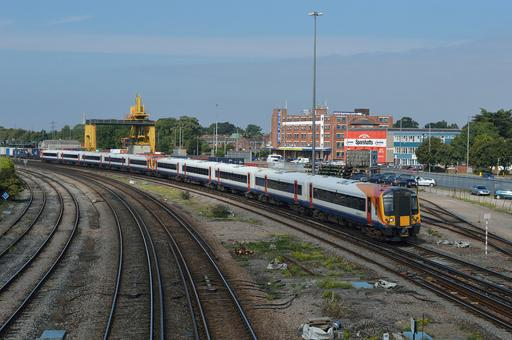

In [11]:
from IPython.display import Image
print('This is my query image')
Image(filename="all_images/train.jpg")

In [12]:
from PIL import Image
from open_clip import create_model_and_transforms, tokenizer
import torch.nn.functional as F

model, _, preprocess = create_model_and_transforms('ViT-B/32', pretrained='openai')

# This converts the image to a tensor
image = preprocess(Image.open("all_images/train.jpg")).unsqueeze(0)

# This calculates the query embedding
query_embedding = F.normalize(model.encode_image(image))

/Users/krishagarwal/anaconda3/lib/python3.11/site-packages/open_clip/factory.py:372: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


/Users/krishagarwal/anaconda3/lib/python3.11/site-packages/open_clip/factory.py:372: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


This is my query image
This is the most similar image from the dataset


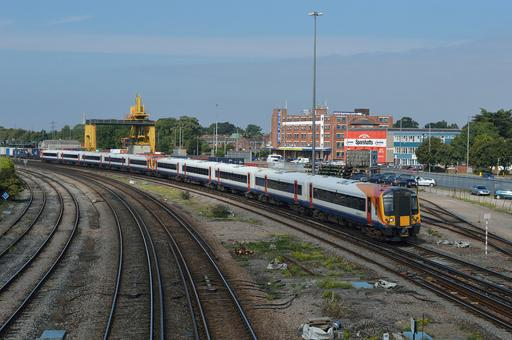

In [16]:
# Retrieve the image path that corresponds to the embedding in `df`
# with the highest cosine similarity to query_embedding
#impath =

from IPython.display import Image
from PIL import Image as PILImage
from open_clip import create_model_and_transforms
import torch.nn.functional as F
import pandas as pd
import numpy as np

# Load the pre-trained CLIP model and preprocessing function
model, _, preprocess = create_model_and_transforms('ViT-B/32', pretrained='openai')

# Load the dataset embeddings
df = pd.read_pickle('all_images/image_embeddings.pickle')

# Display the query image
print('This is my query image')
query_image_path = "all_images/train.jpg"
Image(filename=query_image_path)

# Preprocess the query image
image = preprocess(PILImage.open(query_image_path)).unsqueeze(0)

# Calculate the query embedding
query_embedding = F.normalize(model.encode_image(image), dim=-1).detach().cpu().numpy()

# Calculate cosine similarities between the query embedding and all dataset embeddings
embeddings = np.vstack(df['embedding'].values)
similarities = np.dot(embeddings, query_embedding.squeeze())

# Find the most similar image index
most_similar_index = np.argmax(similarities)

# Retrieve the file name of the most similar image
# Assuming the DataFrame column is named 'file_name'
file_name = df.iloc[most_similar_index]['file_name']
impath = f"all_images/coco_images_resized/{file_name}"

# Display the most similar image
print('This is the most similar image from the dataset')
Image(filename=impath)

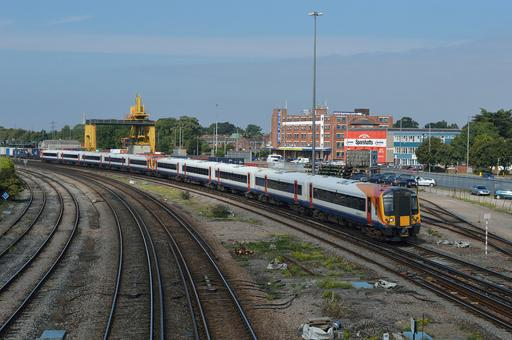

In [17]:
from IPython.display import Image
Image(filename=impath)

### Step 3: Text-to-Image Search

Now implement text-to-image-search.

The only difference here is that the query is a string of text. You will use the text encoder to obtain the corresponding query embedding.

/Users/krishagarwal/anaconda3/lib/python3.11/site-packages/open_clip/factory.py:372: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


Query text: cat cuddles with dog on sofa.
This is the most similar image to the query: 'cat cuddles with dog on sofa.'


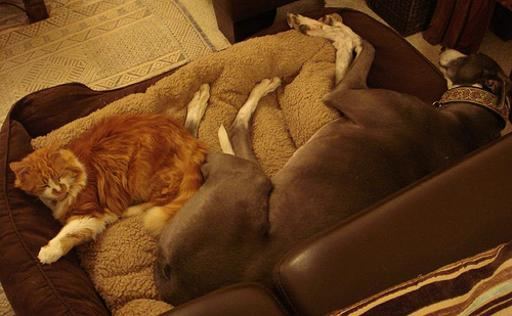

In [19]:
import torch
import open_clip
from IPython.display import Image
import numpy as np
import pandas as pd
import torch.nn.functional as F

# Load the dataset embeddings
df = pd.read_pickle('all_images/image_embeddings.pickle')

# Tokenizer for the CLIP model
tokenizer = open_clip.get_tokenizer('ViT-B-32')  # Updated model name

# Ensure the model is in evaluation mode
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
model.eval()

# Define your text query
text_query = "cat cuddles with dog on sofa."
print(f"Query text: {text_query}")

# Tokenize the query text
text = tokenizer([text_query])

# Calculate the query embedding
with torch.no_grad():
    query_embedding = F.normalize(model.encode_text(text), dim=-1).cpu().numpy()

# Calculate cosine similarities between the query embedding and all dataset embeddings
embeddings = np.vstack(df['embedding'].values)
similarities = np.dot(embeddings, query_embedding.squeeze())

# Find the most similar image index
most_similar_index = np.argmax(similarities)

# Retrieve the file name of the most similar image
file_name = df.iloc[most_similar_index]['file_name']
impath = f"all_images/coco_images_resized/{file_name}"

# Display the most similar image
print(f"This is the most similar image to the query: '{text_query}'")
Image(filename=impath)

### Step 4:  Hybrid Query

A more interesting query could contain both image and text.

For example, instead of explicitly searching for an "image of snowy house", you could search for "snowy" + an image of a house.


In this case, you should embed both the text query and the image query. Then, the query embedding is a weighted average of the two embeddings.

/Users/krishagarwal/anaconda3/lib/python3.11/site-packages/open_clip/factory.py:372: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


This is the most similar image to the hybrid query (text='snowy' and image='house.jpg')


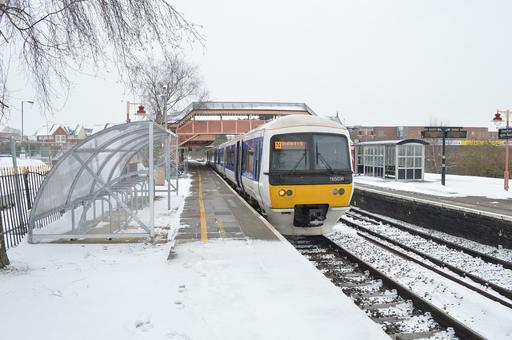

In [21]:
import torch
import open_clip
from PIL import Image as PILImage
import numpy as np
import pandas as pd
import torch.nn.functional as F
from IPython.display import Image

# Load the pre-trained CLIP model and tokenizer
model, _, preprocess = open_clip.create_model_and_transforms('ViT-B-32', pretrained='openai')
tokenizer = open_clip.get_tokenizer('ViT-B-32')

# Ensure the model is in evaluation mode
model.eval()

# Load the dataset embeddings
df = pd.read_pickle('all_images/image_embeddings.pickle')

# Load the image query
image_path = "all_images/train.jpg"
image = preprocess(PILImage.open(image_path)).unsqueeze(0)
image_query = F.normalize(model.encode_image(image), dim=-1)

# Create the text query
text_query = tokenizer(["snowy"])
text_query = F.normalize(model.encode_text(text_query), dim=-1)

# Combine the queries with a weighted average
lam = 0.8  # Weight for the text query
query_embedding = F.normalize(lam * text_query + (1.0 - lam) * image_query, dim=-1).detach().cpu().numpy()

# Calculate cosine similarities between the hybrid query embedding and all dataset embeddings
embeddings = np.vstack(df['embedding'].values)
similarities = np.dot(embeddings, query_embedding.squeeze())

# Find the most similar image index
most_similar_index = np.argmax(similarities)

# Retrieve the file name of the most similar image
file_name = df.iloc[most_similar_index]['file_name']
impath = f"all_images/coco_images_resized/{file_name}"

# Display the most similar image
print(f"This is the most similar image to the hybrid query (text='snowy' and image='house.jpg')")
Image(filename=impath)